# Load data

In [1]:
import core
import numpy as np
import util
# This data is generated by BZ_video_sampling.ipynb
# video_data[time][y][x]
video_data = np.load('data/sampled_video.npy')
T = video_data.shape[0]
NUM_ROW = video_data.shape[1]

NUM_COL = video_data.shape[2]
# Training data is everything but the last 25 frames.
training_video_data = video_data[:-25,:,:]
num_time_full = video_data.shape[0]

# Visualize data

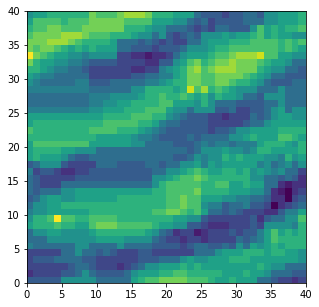

NameError: name 'IMG_PATH_PREFIX' is not defined

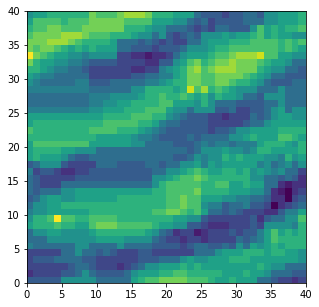

In [2]:
fig = util.visualize_video(video_data[-30:])
fig.savefig(IMG_PATH_PREFIX + 'movie_gold.png', format='png', dpi=DPI)

# Latent variables

Percent energy covered: [0.99952316 0.99974252 0.99992961 0.99993767 0.99994453 0.99995043
 0.99995555 0.99996017 0.99996446 0.99996806 0.99997147 0.99997443
 0.99997725 0.99997986 0.99998242 0.99998493 0.99998706 0.99998903
 0.99999096 0.9999927  0.99999439 0.99999595 0.99999739 0.99999878
 1.        ]


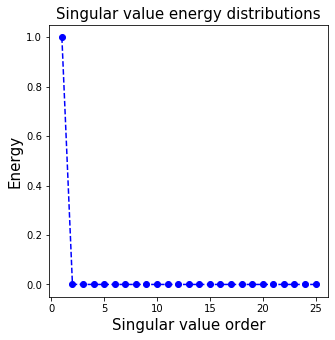

In [3]:
import core

DPI = 120
IMG_PATH_PREFIX = 'writeup/images/'
training_data = core.from_video_to_data_matrix(training_video_data)
fig = core.plot_energy_from_singular_values(training_data)
fig.savefig(IMG_PATH_PREFIX + 'movie_energy.png', format='png', dpi=DPI)

Even one mode is enough to capture more than 99.9% of the energy! We don't actually need any embedding here.

# Regular DMD prediction

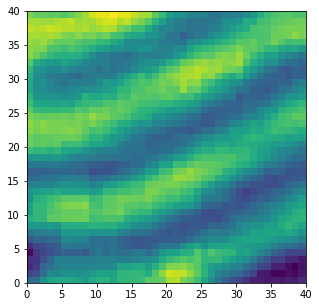

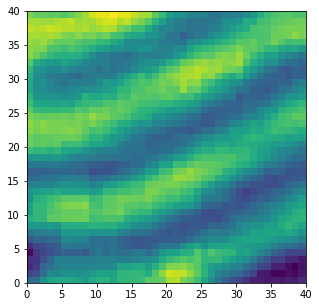

In [4]:
Phi, Lambda, b = core.dmd(training_data, r = 3)
prediction = core.get_xt_from_dmd(num_time=num_time_full, Phi = Phi, Lambda = Lambda, b = b)
prediction_video = core.from_data_matrix_to_video(prediction)

fig = util.visualize_video(prediction_video[-25:])

fig.savefig(IMG_PATH_PREFIX + 'movie_dmd.png', format='png', dpi=DPI)

# Time embedded DMD prediction

Percent energy covered: [0.99952535 0.99974838 0.99992794 0.9999354  0.99994214 0.99994782
 0.99995302 0.99995737 0.99996147 0.99996535 0.99996889 0.99997233
 0.99997533 0.99997825 0.99998111 0.99998373 0.99998628 0.99998868
 0.99999086 0.99999284 0.99999475 0.9999966  0.99999837 1.        ]


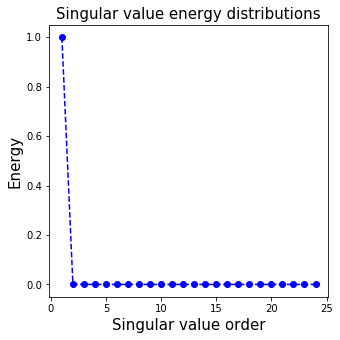

In [6]:
time_delayed_data = core.time_delay_embed(training_data, k = 2)
fig = core.plot_energy_from_singular_values(time_delayed_data)

In [7]:
Phi, Lambda, b = core.dmd(time_delayed_data, r = 3)
pred_time_delayed_xt = core.get_xt_from_dmd(num_time=num_time_full, Phi = Phi, Lambda = Lambda, b = b)

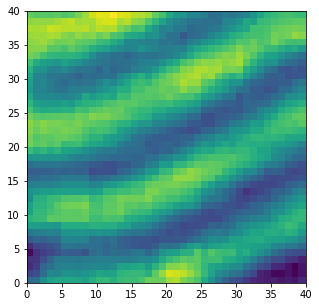

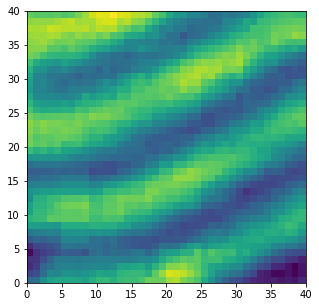

In [8]:
# Only take the first image from the delayed matrix
prediction_video = core.from_data_matrix_to_video(pred_time_delayed_xt[:NUM_ROW * NUM_COL,:])
fig = util.visualize_video(prediction_video[-25:])
fig.savefig(IMG_PATH_PREFIX + 'movie_time_delayed_dmd.png', format='png', dpi=DPI)

# Modes

In [10]:
U, singular_vals, Vh = np.linalg.svd(training_data)

In [11]:
first_three_modes = core.from_data_matrix_to_video(U[:,:3])

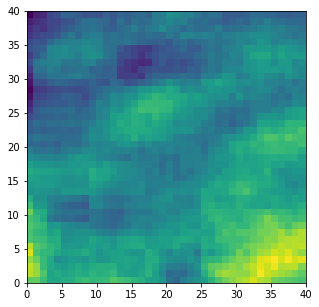

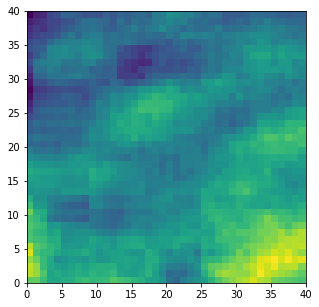

In [12]:
fig = util.visualize_video(first_three_modes[:1,:,:])
fig.savefig(IMG_PATH_PREFIX + 'movie_mode1.png', format='png', dpi=DPI)

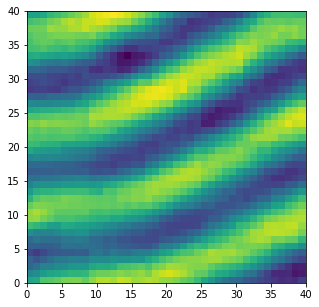

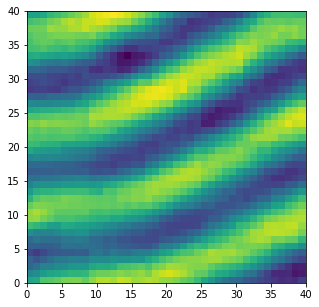

In [13]:
fig = util.visualize_video(first_three_modes[1:2,:,:])
fig.savefig(IMG_PATH_PREFIX + 'movie_mode2.png', format='png', dpi=DPI)

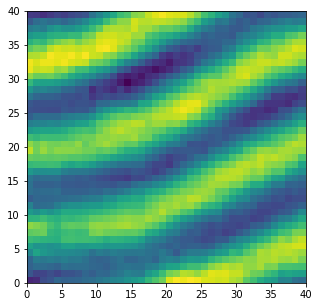

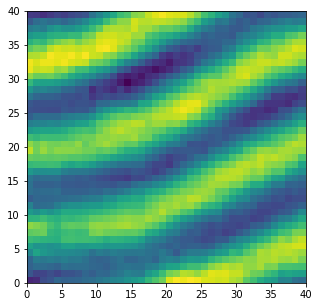

In [14]:
fig = util.visualize_video(first_three_modes[2:3,:,:])
fig.savefig(IMG_PATH_PREFIX + 'movie_mode3.png', format='png', dpi=DPI)